<a href="https://colab.research.google.com/github/Angelo-Data-Science/Portfolio-Projects/blob/main/Angelo_Analisando_Dados_do_Airbnb_Oslo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Data Analysis Airbnb - *Oslo, Norway*

[Airbnb](https://www.airbnb.com.br/) is considered the **largest hotel company today**, even though **it does not own a single hotel**!

By connecting people who are looking for accommodation during their travels with hosts who want to rent out their properties in a practical way, Airbnb provides an innovative platform that makes this alternative way to get accommodation possible.

By the end of 2018, the Startup founded 10 years earlier had already **hosted more than 300 million people** around the world, challenging traditional hotel chains.

One of Airbnb's initiatives is to make data from its website about some of the world's main cities publicly available. In the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal, you can download a large amount of data to develop Data Science projects and solutions.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this notebook, we will analyze data for the city of Oslo, the capital of Norway, and check what insights we can extract from the raw data.**

## Data Acquisition

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importing listings.csv file to a DataFrame
df = pd.read_csv('https://data.insideairbnb.com/norway/oslo/oslo/2024-06-29/visualisations/listings.csv')

## **Analysing the data**


Defining the features:

* `id` - id number generated to identify the property
* `name` - name of the advertised property
* `host_id` - property owner (host) id number
* `host_name` - Host name
* `neighbourhood_group` - this column contains no valid values
* `neighbourhood` - neighborhood name
* `latitude` - property latitude coordinate
* `longitude` - property longitude coordinate
* `room_type` - type of room offered
* `price` - property rental price
* `minimum_nights` - minimum number of nights to book
* `number_of_reviews` - property's number of reviews
* `last_review` - last review date
* `reviews_per_month` - number of reviews per month
* `calculated_host_listings_count` - number of properties owned by the same host
* `availability_365` - number of days available within 365 days

Before starting the analisys, we take a look at the first 5 entries of the dataset.

In [3]:
# showing the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,NaN,Frogner,59.91201,10.72455,Entire home/apt,3400.0,4,52,2024-06-15,0.39,2,297,2,NaN
1,71725,Central big room - ap with balcony,368229,Reidun,NaN,Gamle Oslo,59.90795,10.77987,Private room,572.0,14,56,2024-05-15,0.34,1,281,3,NaN
2,85902,"Stylish design Apt, super central",250159,Melissa,NaN,Gamle Oslo,59.91074,10.77232,Entire home/apt,1929.0,3,79,2024-01-23,0.50,2,26,5,NaN
3,123041,"Cozy room in design apartment, central east side",250159,Melissa,NaN,Gamle Oslo,59.91253,10.77205,Private room,736.0,1,235,2023-09-27,1.48,2,1,4,NaN
4,149776,Bird's nest in the heart of Oslo,714768,Henrik,NaN,St. Hanshaugen,59.92398,10.74787,Private room,1029.0,5,43,2023-04-23,0.27,2,363,0,NaN


### **Q1. How many attributes (variables) and how many entries does our dataset have? What are the types of variables?**

In [4]:
# identifying the data volume of the DataFrame
#print('Entradas:\t {}'.format(df.shape[0])) ---> código apresentado no notebook da aula
#print('Variáveis:\t {}'.format(df.shape[1])) ---> código apresentado no notebook da aula

print('Entradas:\t' + str(df.shape[0]))
print('Variáveis:\t' + str(df.shape[1]))

display(df.dtypes)

Entradas:	10099
Variáveis:	18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. What is the percentage of abscent values ​​in the dataset?**

In [5]:
# descending order of variables with missing values (%)
(((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)).round(2)

,0
license,100.00
neighbourhood_group,100.00
reviews_per_month,26.87
last_review,26.87
price,12.37
neighbourhood,0.00
latitude,0.00
longitude,0.00
room_type,0.00
name,0.00


In [6]:
# excluding variables with absent values
df.drop(['license', 'neighbourhood_group'], axis=1, inplace=True)

### **Q3. What is the type of distribution of the variables?**

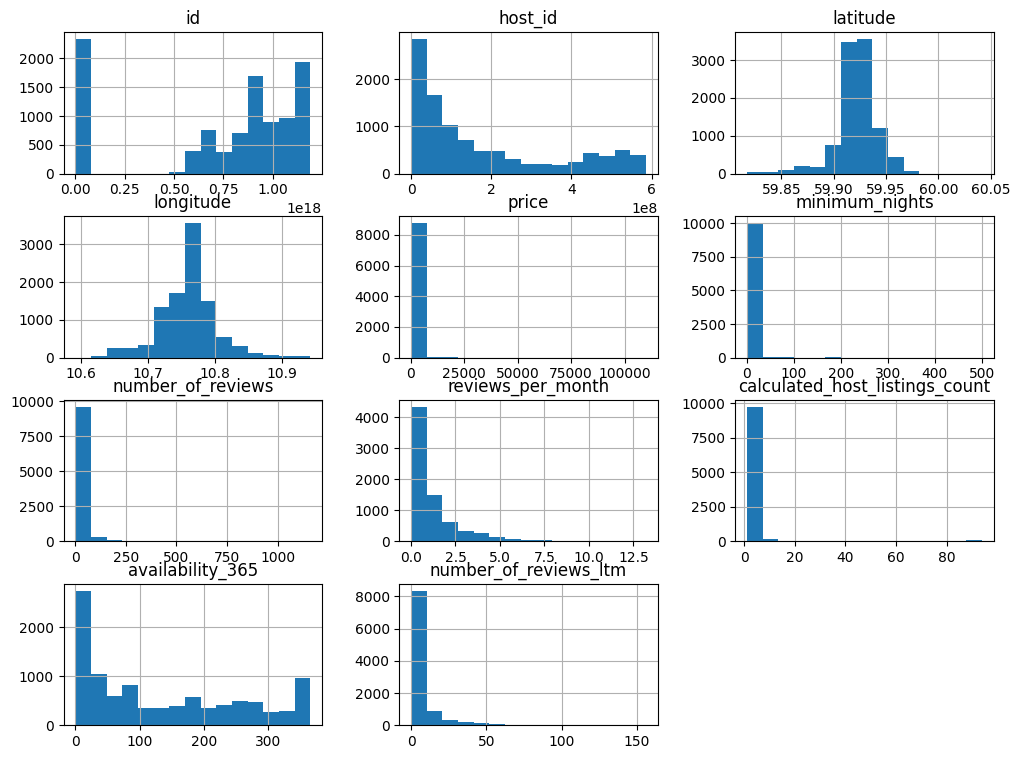

In [7]:
# plotting numerical variables histogram
df.hist(bins=15, figsize=(12, 9));

In [8]:
# statistical summary of numerical variables(to detect outliers)
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8850.000000,10099.000000,10099.000000,7385.000000,10099.000000,10099.000000
mean,1691.398531,3.973067,16.598970,1.224864,2.466482,134.049609
std,2297.924650,12.245705,43.616216,1.574437,9.174954,122.260856
min,160.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,971.000000,2.000000,0.000000,0.270000,1.000000,22.000000
50%,1304.500000,2.000000,4.000000,0.660000,1.000000,90.000000
75%,1902.750000,3.000000,14.000000,1.480000,1.000000,241.000000
max,110000.000000,500.000000,1161.000000,13.210000,94.000000,365.000000


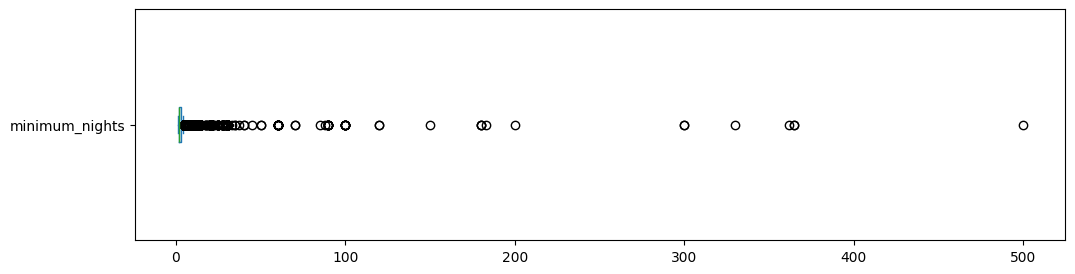

Values of "mininum_nigths" greater than 30:
71
Percentage of "mininum_nigths" values greater than 30:
0.7030399049410833


In [9]:
# plotting minimum number of nights:
df['minimum_nights'].plot(kind='box', vert=False, figsize=(12, 3))
plt.show()

# quantity and percentage of values above 30 days for "minimum_nights":
print('Values of "mininum_nigths" greater than 30:')
print(len(df[df.minimum_nights > 30]))
print('Percentage of "mininum_nigths" values greater than 30:')
print(((len(df[df.minimum_nights > 30]) / df.shape[0]*100)))

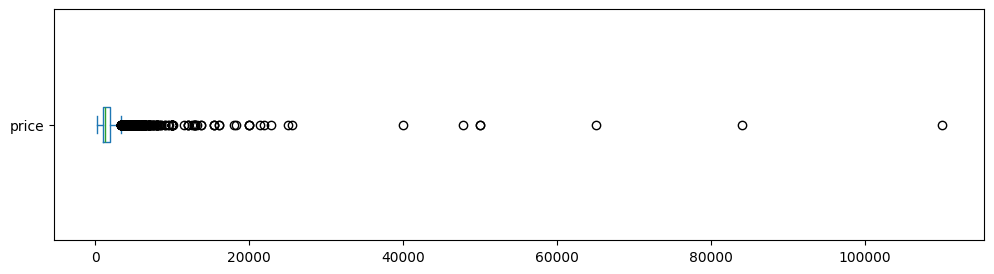

Number of values greater than 3000: 671
Perc. of "price" values greater than 3000: 6.644222200217843 %


In [10]:
# plotting "price":
df['price'].plot(kind='box', vert=False, figsize=(12, 3))
plt.show()

# quantity of values greater than 3000 for "price"
print('Number of values greater than 3000:', str(len(df[df.price > 3000])))
print('Perc. of "price" values greater than 3000:', str((len(df[df.price > 3000]) / df.shape[0])*100), '%')

# códigos apresentados no notebook da aula:
# print("\nprice: valores acima de 1500")
# print("{} entradas".format(len(df[df.price > 1500])))
# print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Removing the outliers

In [11]:
# removing outliers with a new df
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 3000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

In [12]:
# df stats without outliers
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.360000e+03,9.360000e+03,9360.000000,9360.000000,8119.000000,9360.000000,9360.000000,6930.000000,9360.000000,9360.000000,9360.000000
mean,7.357674e+17,1.777430e+08,59.922101,10.760923,1383.334278,3.253098,16.932585,1.250026,2.476175,129.468269,6.795940
std,4.245422e+17,1.800251e+08,0.020375,0.043220,593.201115,3.857481,44.494435,1.588398,9.463121,120.858032,13.301039
min,7.172500e+04,4.306700e+04,59.817260,10.627710,160.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,6.097882e+17,3.501472e+07,59.913749,10.738438,950.000000,2.000000,0.000000,0.280000,1.000000,20.000000,0.000000
50%,9.029051e+17,9.668971e+07,59.923144,10.763295,1253.000000,2.000000,4.000000,0.690000,1.000000,88.000000,2.000000
75%,1.073848e+18,2.770868e+08,59.931970,10.780240,1743.000000,3.000000,14.000000,1.520000,1.000000,235.000000,7.000000
max,1.189092e+18,5.860672e+08,60.041562,10.941170,3000.000000,30.000000,1161.000000,13.210000,94.000000,365.000000,156.000000


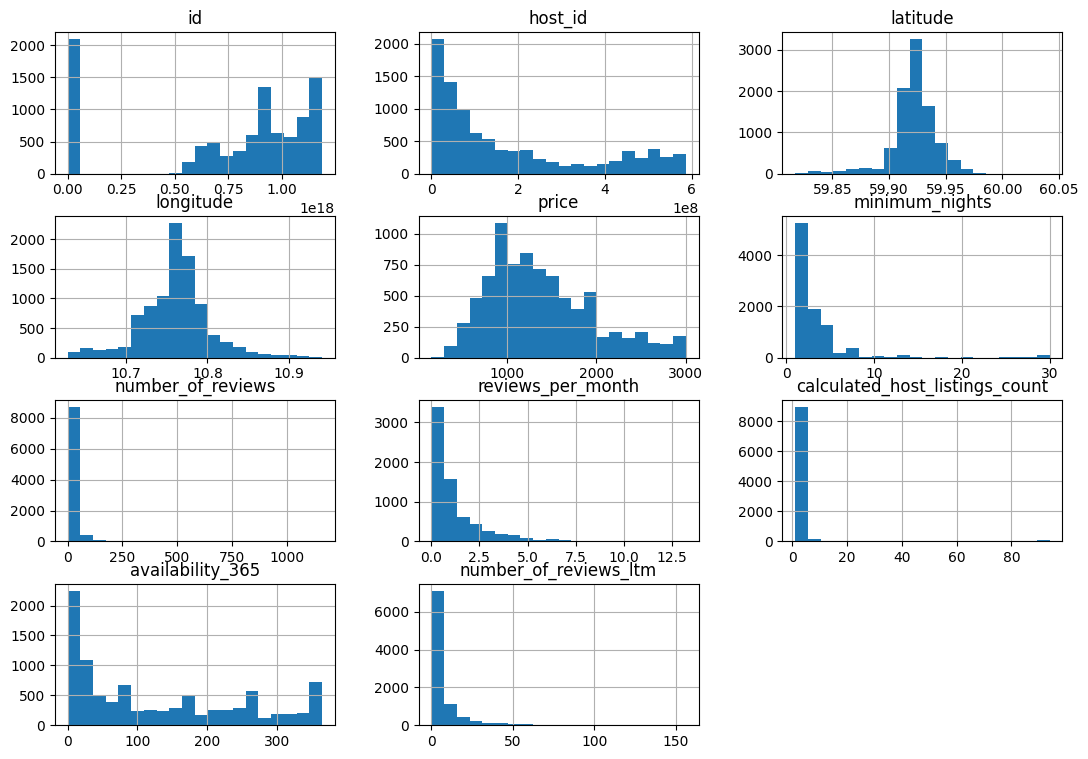

In [13]:
# histogram without "price" and "minimum nights" outliers
df_clean.hist(bins=20, figsize=(13, 9));

### **Q4. What are the average (mean) rental prices?**

In [14]:
# checking the `price`column mean (with outliers)
df.price.mean()

1691.3985310734463

In [15]:
# checking the `price`column mean (without outliers)
df_clean.price.mean()

1383.3342776203965

### **Q4. What is the correlation between the variables?**

In [16]:
# creating a correlation matrix
corr = df_clean[['reviews_per_month', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

# showing the correlation matrix
display(corr)

,reviews_per_month,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
reviews_per_month,1.000000,-0.135422,-0.169002,0.418009,0.088035,0.026705
price,-0.135422,1.000000,-0.030356,-0.101837,-0.096432,0.077065
minimum_nights,-0.169002,-0.030356,1.000000,-0.051001,-0.014703,-0.014833
number_of_reviews,0.418009,-0.101837,-0.051001,1.000000,0.128364,0.033777
calculated_host_listings_count,0.088035,-0.096432,-0.014703,0.128364,1.000000,0.130095
availability_365,0.026705,0.077065,-0.014833,0.033777,0.130095,1.000000


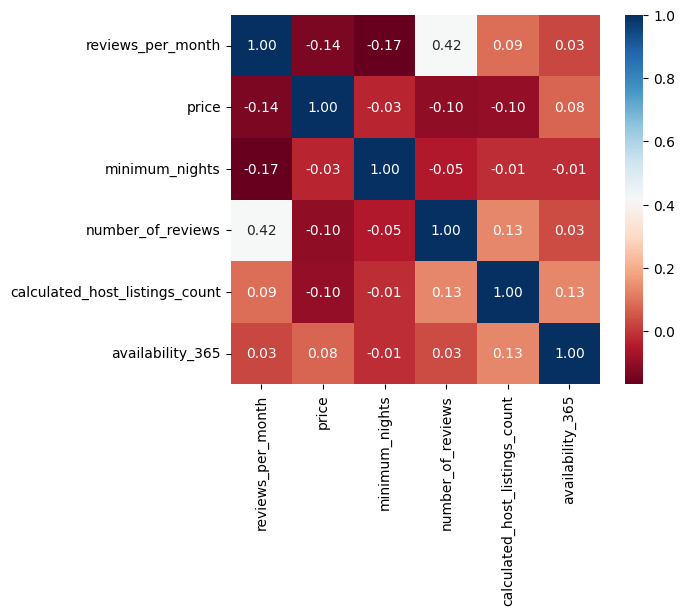

In [17]:
# plotting a heatmap from correlations
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linewidths=0, linecolor='white', annot=True);

### **Q5. What is the most rented type of property on Airbnb in Oslo?**

In [18]:
# showing the quantity of each property type available
print(df_clean['room_type'].value_counts())

room_type
Entire home/apt    8047
Private room       1267
Shared room          45
Hotel room            1
Name: count, dtype: int64


In [19]:
# showing the percentage of each property type available
print((df_clean.room_type.value_counts() / df_clean.shape[0] * 100).round(2))

room_type
Entire home/apt    85.97
Private room       13.54
Shared room         0.48
Hotel room          0.01
Name: count, dtype: float64


### **Q6. What is the most expensive location in the dataset?**



In [20]:
# showing (mean) prices by neighborhood (form most expensive to less expensive)
# most expensive neighborhood/bairro mais caro
#df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
print(df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False).head(10))

neighbourhood
Sentrum           1604.075000
Nordstrand        1550.598101
Vestre Aker       1534.720430
Frogner           1508.442623
Ullern            1456.655870
Nordre Aker       1451.947020
Gamle Oslo        1417.767635
St. Hanshaugen    1415.187433
Marka             1374.750000
Grünerløkka       1334.318813
Name: price, dtype: float64


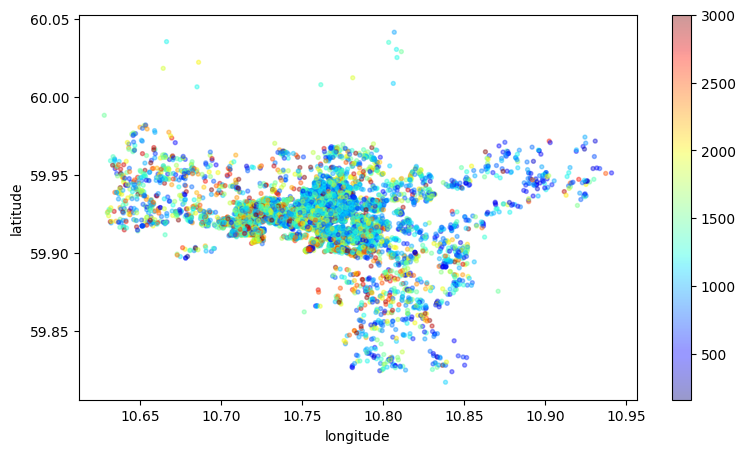

In [21]:
# plotting properties by latitude and longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', figsize=(9, 5), alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'));

### **Q7. What is the average (mean) minimum number of nights for rental (minimum_nights)?**

In [22]:
# Mean of 'minimum_nights' column
df_clean.minimum_nights.mean()

3.253098290598291

## Takeaways


This is a general analysis of the Airbnb database for the city of Oslo, the capital of Norway. It was observed that there are some outliers, and they were removed.

The average (mean) rental price is 18% lower without the outliers.

This dataset is a summarized version, meant for an initial approach only. It is recommended that the complete version of the dataset be used in any future exploratory analysis.